# **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# **Loading the dataset**

In [ ]:
data = pd.read_csv("hotel_booking.csv")
df= data.copy()

# **Exploratory Data Analysis And Data Cleaning**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# reservation_status_date	has data type as object, so we have to convert it into date-time format for analysis

In [ ]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [ ]:
df.describe(include="object") #summary for categorical data

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
for col in df.describe().columns:
  print(col)
  print(df[col].unique())
  print("-"*100)

is_canceled
[0 1]
----------------------------------------------------------------------------------------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99  95  96  69  45  40  15  36  43  70  16 107  47 113  90
  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364 324
  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8 100
  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112  65
  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108 106
  31  87  41 304 117  59  53  58 116  42 321  38 118  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(["agent", "company"], axis = 1, inplace = True)
df.dropna(inplace=True)

# Dropping 'agent' and 'company' Columns because They Have Too Many Missing Values
# After reviewing the data, it's clear that these columns are not useful due to lots of missing information, so I'm removing them.
# Additionally, we're also getting rid of any missing information in the other columns to keep things clean and tidy.

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# I've removed outliers only from the essential column for my analysis, leaving others intact.


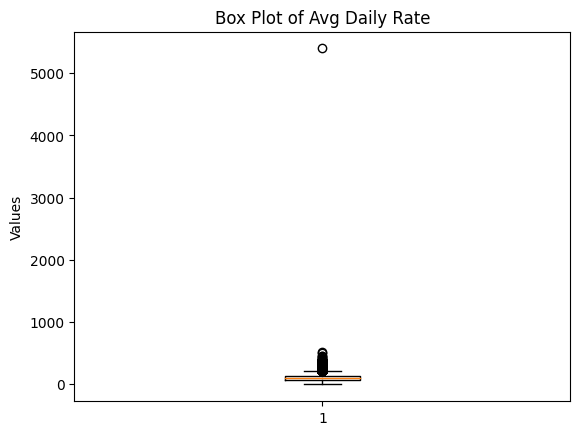

In [ ]:
plt.boxplot(data['adr'])
plt.title('Box Plot of Avg Daily Rate')
plt.ylabel('Values')
plt.show()

In [ ]:
df = df[df["adr"] < 5000 ] # adr means Avarage Daily rate

In [ ]:
# I've filtered the DataFrame to exclude values in the 'adr' column that are greater than 5000,
# as these outliers might adversely affect our analysis.

In [ ]:
df["adr"].describe ()

count    118897.000000
mean        101.958683
std          48.091199
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [ ]:
# By removing values greater than 5000 in the 'adr' column,
# we can clearly observe that the maximum value has reduced from 5400, to 510. which indicates the impact of removing outliers.

# **Data Analysis and Visualization**

**Our analysis is in line with our problem statement.**


In [ ]:
import plotly.graph_objects as go

cancelled_prec = df["is_canceled"].value_counts(normalize=True) * 100

fig = go.Figure()

fig.add_trace(go.Bar(x=["Not Canceled", "Canceled"],
                     y=df["is_canceled"].value_counts(),
                     marker_color=['#bcbd42', '#d62728'],
                     width=0.7))

fig.update_layout(
    title="Reservation Status Count",
    title_font_size=24,  # Set title font size to 24
    title_x=0.5,  # Center title horizontally
    xaxis_title="Reservation Status",
    yaxis_title="Count",
    width=500,
    height=400
)

print(cancelled_prec)
fig.show()


0    62.865337
1    37.134663
Name: is_canceled, dtype: float64


**Insight:**

Notably, the booking cancellation rate stands at 37%, a significant factor for the hotel industry.
We'll prioritize addressing this in our analysis.

In [ ]:
resort_hotel  = df[df["hotel"] =="Resort Hotel"]
print("Resort Hotel")
print( resort_hotel["is_canceled"].value_counts(normalize = True)  * 100)

city_hotel  = df[df["hotel"] =="City Hotel"]
print("City Hotel")
print (city_hotel["is_canceled"].value_counts(normalize = True) * 100 )


Resort Hotel
0    72.024952
1    27.975048
Name: is_canceled, dtype: float64
City Hotel
0    58.291825
1    41.708175
Name: is_canceled, dtype: float64


In [ ]:
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame with "hotel" and "is_canceled" columns
colors = ["#3498db", "#e74c3c"]
df["Reservation Status"] = df["is_canceled"].map({0: "Not Canceled", 1: "Canceled"})

hotel_names = df["hotel"].unique()
data = []

for hotel_name in hotel_names:
    hotel_data = df[df["hotel"] == hotel_name]
    reservation_counts = hotel_data.groupby("Reservation Status").size()
    data.append(reservation_counts)

fig = go.Figure(data=[
    go.Bar(name='Not Canceled', x=hotel_names, y=[count.get("Not Canceled", 0) for count in data], marker_color=colors[0]),
    go.Bar(name='Canceled', x=hotel_names, y=[count.get("Canceled", 0) for count in data], marker_color=colors[1])
])

fig.update_layout(
    barmode='group',
    xaxis_title="Hotel",
    yaxis_title="Number of Reservations",
    legend_title="Reservation Status",
    title="Reservation Status in Different Hotels",
    title_font_size=24,  # Set title font size to 24
    title_x=0.5,  # Center title horizontally
    width=800,
    height=400,
)

fig.show()


**Resort Hotel Insights:**

Resort Hotel guests exhibit a relatively lower cancellation rate, with approximately 28% of reservations canceled.
This suggests that guests booking Resort Hotels tend to be more committed to their stays.

**City Hotel Insights:**

City Hotels experience a higher cancellation rate, with around 42% of reservations canceled.
It appears that guests booking City Hotels may have more flexible travel plans or reasons for cancellations.

**Insight** :
The data reveals that, on average, the daily prices for City Hotels are slightly lower than those for Resort Hotels.

In [ ]:
import plotly.express as px

# Assuming 'resort_hotel' and 'city_hotel' are already grouped DataFrames

fig = px.line(title='Average Daily Rate in City and Resort Hotel')
fig.add_scatter(x=resort_hotel.index, y=resort_hotel['adr'], mode='lines', name='Resort Hotel')
fig.add_scatter(x=city_hotel.index, y=city_hotel['adr'], mode='lines', name='City Hotel')

fig.update_xaxes(
    showticklabels=False,  # Hide x-axis labels
)

fig.update_layout(
    xaxis_title='',  # Clear the default x-axis title
    yaxis_title='Average Daily Rate (ADR)',
    legend=dict(
        title=dict(text="Hotel Type"),
        font=dict(size=16)
    ),
    title_font_size=24,  # Set title font size to 24
    width=1000,
    height=500,
    title_x=0.5,  # Center title horizontally
    title_y=0.95  # Adjust title's vertical position
)

# Add a text annotation at the bottom for the x-axis label
fig.add_annotation(
    text='Reservation Status Time-Line',
    xref='paper',
    yref='paper',
    x=0.5,
    y=-0.15,
    showarrow=False,
    font=dict(size=16)
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame with "reservation_status_date" and "is_canceled" columns
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df["month"] = df["reservation_status_date"].dt.month

# Create a DataFrame for counting reservations
count_df = df.groupby(["month", "is_canceled"]).size().reset_index(name='count')

# Map 'is_canceled' values to human-readable labels
count_df['is_canceled'] = count_df['is_canceled'].map({0: 'Not Cancelled', 1: 'Cancelled'})

fig = go.Figure()

for status in count_df['is_canceled'].unique():
    data = count_df[count_df['is_canceled'] == status]
    fig.add_trace(go.Bar(
        x=data["month"],
        y=data["count"],
        name=status
    ))

fig.update_layout(
    title="Reservation Status per Month",title_font=dict(size=24),
    xaxis_title="Month",
    yaxis_title="Number of Reservations",
    barmode="group",
    legend_title="Reservation Status",
    title_x=0.5  # Set title's x position to 0.5 (centered)
)

fig.show()


In [ ]:
# Filter the DataFrame for canceled reservations (is_canceled == 1)
cancelled_data = df[df["is_canceled"] == 1]
monthly_adr_sum = cancelled_data.groupby("month")[["adr"]].sum().reset_index()
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_adr_sum["month"] = monthly_adr_sum["month"].apply(lambda x: month_names[x - 1])

fig = px.bar(monthly_adr_sum, x="month", y="adr", title="Average Daily Rate per Month",
             labels={'month': 'Month', 'adr': 'Average Daily Rate'},color="month")

fig.update_layout(title_font_size=20)
fig.show()

**Insight :**

Analyzing both graphs reveals a significant correlation between increased prices and higher cancellation rates, notably evident during the first month.

In [ ]:
import plotly.express as px

cancelled_data = df[df["is_canceled"] == 1]
top_10_country = cancelled_data["country"].value_counts()[:10]

fig = px.pie(values=top_10_country, names=top_10_country.index, title="Top 10 Countries With Reservation Cancelled",
             labels={'names': 'Country'})

fig.update_traces(textinfo='percent+label')
fig.show()


**Insight:**

Portugal exhibits the highest rate of canceled reservations, emphasizing the need for increased attention to this country in our strategy.

In [ ]:
df["market_segment"].value_counts(normalize=True) * 100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

**Insight :**

Online Travel Agents dominate reservations at 47.44%, followed by Offline Travel Agents (20.32%), with other segments contributing smaller percentages.

In [ ]:
cancelled_data ['market_segment'].value_counts(normalize=True) * 100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

**Insight:**

 Online Travel Agent bookings experience a notably high cancellation rate, with nearly 47% of them being canceled.
 This suggests a higher risk of cancellation associated with OTA reservations compared to other market segments.

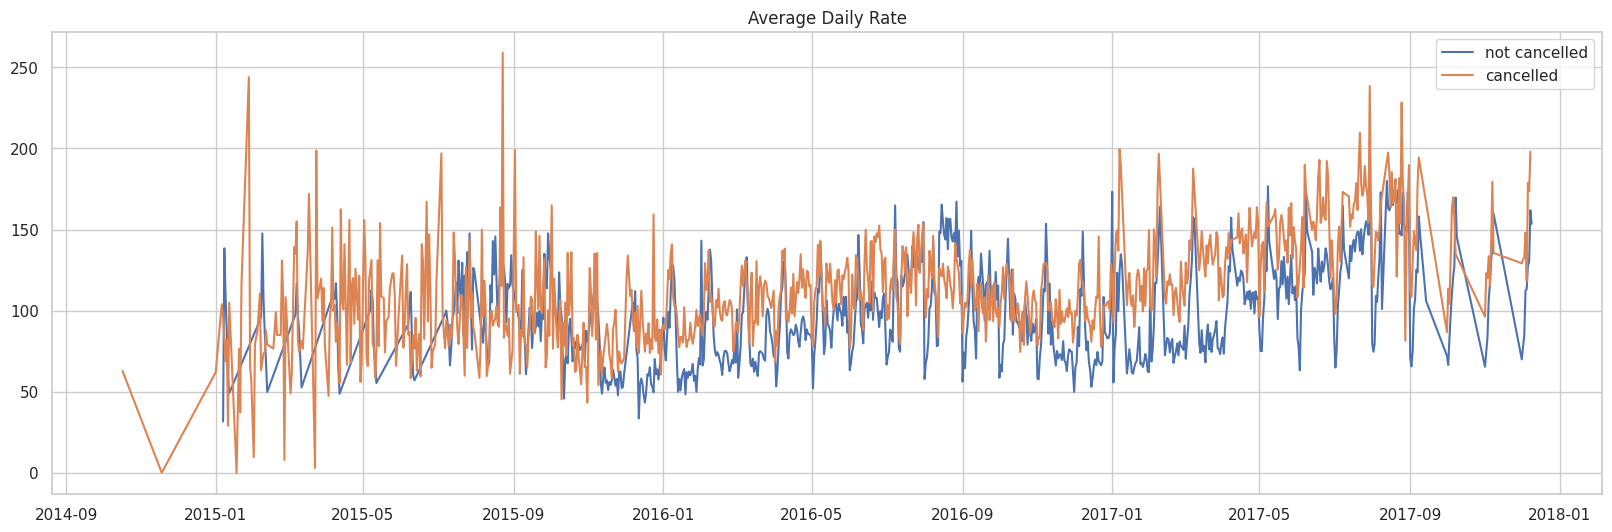

In [ ]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
not_cancelled_data=df[df["is_canceled"] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values ('reservation_status_date', inplace=True)
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

In [ ]:
# To make things easier to grasp, we'll only look at data from January 2016 to September 2017. This way, we can understand it better.

In [ ]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr["reservation_status_date"] > "2016") & (cancelled_df_adr["reservation_status_date"] < "2017-09")]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr["reservation_status_date"] > "2016") & (not_cancelled_df_adr["reservation_status_date"] < "2017-09")]

# This code filters data for canceled and not canceled reservations between January 2016 and September 2017.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=not_cancelled_df_adr['reservation_status_date'], y=not_cancelled_df_adr['adr'],
                         mode='lines', name='not cancelled', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=cancelled_df_adr['reservation_status_date'], y=cancelled_df_adr['adr'],
                         mode='lines', name='cancelled', line=dict(color='red')))

fig.update_layout(title='Average Daily Rate', legend=dict(font=dict(size=15)))
fig.show()


**Analyzing this graph, it becomes evident that price plays a significant role in reservation cancellations.**